<div dir="rtl" style="width:90%; margin:auto">
<code>GC</code> به صورت متناوب بیدار می‌شود و گراف اشیاء ذخیره شده روی heap را دنبال می‌کند تا تعیین کند کدام اشیاء می‌توانند به عنوان زباله در نظر گرفته شده و جمع‌آوری شوند.

<h3>آغاز جمع‌آوری زباله</h3>
<p>GC با انجام تخصیص حافظه (از طریق کلمه کلیدی new) یک جمع‌آوری زباله را آغاز می‌کند، یا بعد از اینکه یک حد خاصی از حافظه تخصیص داده شده است، یا در مواقع دیگر برای کاهش حافظه مصرفی برنامه. این فرآیند می‌تواند به صورت دستی نیز با فراخوانی System.GC.Collect آغاز شود. در طول یک جمع‌آوری زباله، همه نخ‌ها می‌توانند متوقف شوند (اطلاعات بیشتر در بخش بعدی).</p>

<h3>فرآیند علامت‌گذاری و جمع‌آوری</h3>

<p>GC با مراجع ریشه‌ای اشیاء خود شروع می‌کند و گراف اشیاء را پیمایش می‌کند، تمامی اشیائی که دست می‌خورد را به عنوان دسترسی‌پذیر علامت‌گذاری می‌کند. وقتی این فرآیند کامل شد، تمامی اشیائی که علامت‌گذاری نشده‌اند به عنوان غیرقابل استفاده در نظر گرفته می‌شوند و برای جمع‌آوری زباله آماده هستند. اشیاء غیرقابل استفاده که finalizer ندارند بلافاصله حذف می‌شوند؛ اشیاء غیرقابل استفاده با finalizer در صفی برای پردازش در نخ finalizer پس از اتمام GC قرار می‌گیرند. این اشیاء سپس در جمع‌آوری زباله بعدی برای نسل خود قابل جمع‌آوری می‌شوند (مگر اینکه دوباره احیا شوند).</p>

<h3>فشرده‌سازی حافظه</h3>

<p>اشیاء باقی‌مانده "زنده" سپس به ابتدای heap منتقل می‌شوند (فشرده‌سازی)، آزادسازی فضای برای اشیاء بیشتر. این فشرده‌سازی دو هدف را دنبال می‌کند: جلوگیری از تکه‌تکه شدن حافظه و اجازه به GC برای استفاده از یک استراتژی بسیار ساده در تخصیص اشیاء جدید، که همیشه حافظه را در انتهای heap تخصیص می‌دهد. این کار از وظیفه بالقوه زمان‌بر نگهداری لیست قطعات حافظه آزاد جلوگیری می‌کند.</p>

<h3>استثنای OutOfMemoryException</h3>

<p>اگر پس از جمع‌آوری زباله فضای کافی برای تخصیص حافظه برای یک شیء جدید وجود نداشته باشد و سیستم عامل نتواند حافظه بیشتری ارائه دهد، یک استثنای OutOfMemoryException پرتاب می‌شود.</p>
</div>

### Optimization Techniques  

The `GC` incorporates various optimization techniques to `reduce` the g`arbage collection time`.

#### Generational collection(بهینه‌سازی نسل‌محور)

<div dir="rtl" style="width:90%; margin:auto">
<h3>تقسیم‌بندی heap مدیریت شده</h3>
<p>GC heap مدیریت شده را به سه نسل تقسیم می‌کند:</p>

<ul><li><strong>Gen0</strong>: اشیائی که به تازگی تخصیص داده شده‌اند.</li><li><strong>Gen1</strong>: اشیائی که یک چرخه جمع‌آوری را پشت سر گذاشته‌اند.</li><li><strong>Gen2</strong>: سایر اشیاء.</li></ul>

<h3>نسل‌های موقت (Ephemeral Generations)</h3>

<p>Gen0 و Gen1 به عنوان نسل‌های موقت (کوتاه‌مدت) شناخته می‌شوند. CLR بخش Gen0 را نسبتاً کوچک نگه می‌دارد (معمولاً چند صد کیلوبایت تا چند مگابایت). هنگامی که بخش Gen0 پر می‌شود، GC یک جمع‌آوری Gen0 را آغاز می‌کند که این امر نسبتاً به‌طور مکرر اتفاق می‌افتد. GC یک آستانه حافظه مشابه را برای Gen1 اعمال می‌کند (که به عنوان یک بافر برای Gen2 عمل می‌کند)، بنابراین جمع‌آوری‌های Gen1 نیز نسبتاً سریع و مکرر هستند. اما جمع‌آوری‌های کامل که شامل Gen2 نیز می‌شوند، مدت زمان بیشتری طول می‌کشند و بنابراین کمتر اتفاق می‌افتند.</p>

<h3>زمان‌بندی جمع‌آوری زباله</h3>
<p>برای ارائه ارقام تقریبی:</p>

<ul><li><strong>جمع‌آوری Gen0</strong> ممکن است کمتر از یک میلی‌ثانیه طول بکشد که در یک برنامه معمولی قابل توجه نیست.</li><li><strong>جمع‌آوری کامل (شامل Gen2)</strong> ممکن است تا 100 میلی‌ثانیه طول بکشد در برنامه‌هایی با گراف‌های شیء بزرگ. این ارقام به عوامل زیادی بستگی دارند و می‌توانند به‌طور قابل‌توجهی متفاوت باشند، به‌ویژه در مورد Gen2 که اندازه‌اش نامحدود است (برخلاف Gen0 و Gen1).</li></ul>

</div>

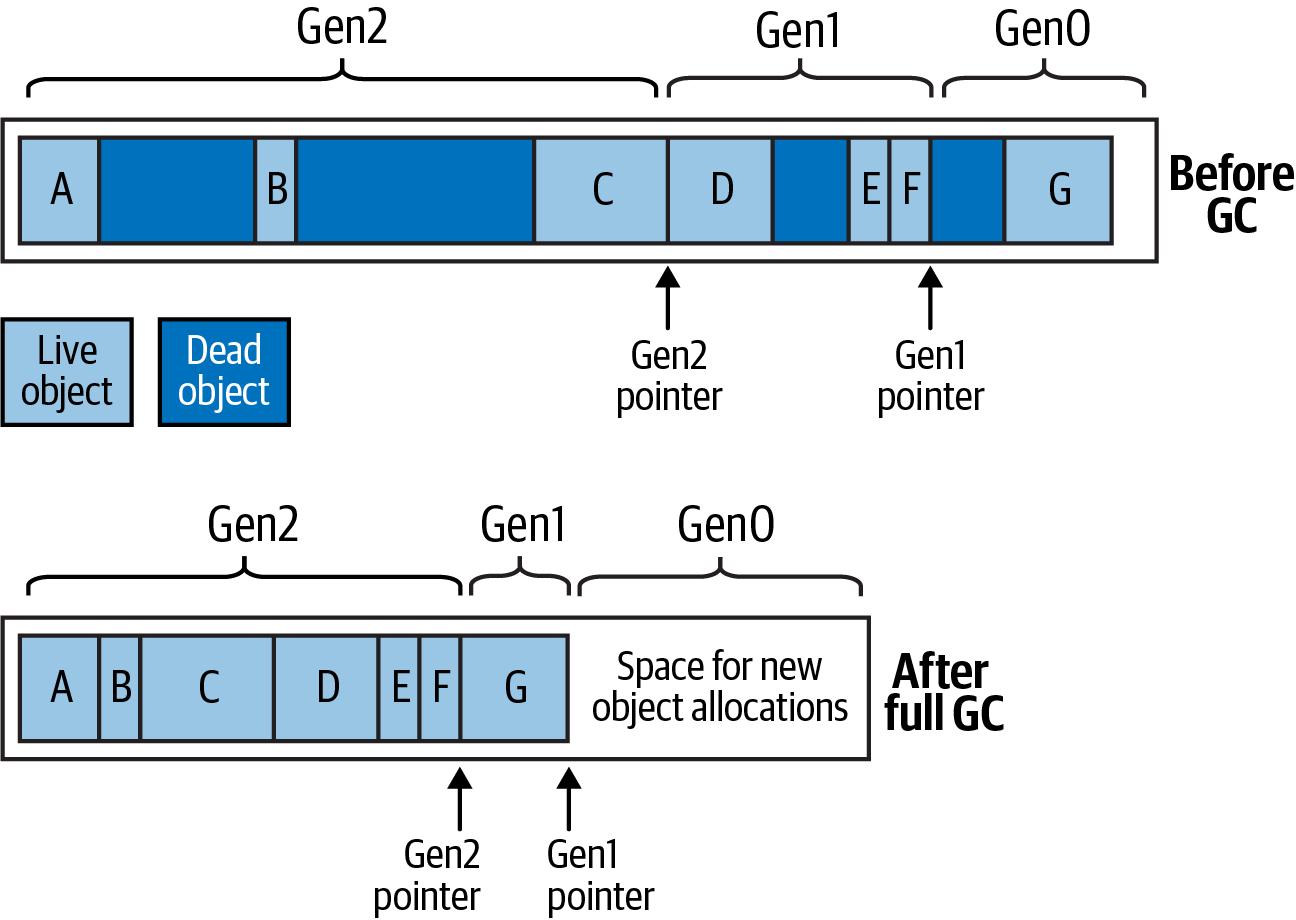

In [ ]:
//The StringBuilders created in the following method would almost certainly be
//collected in a fast Gen0
string Foo()
{
    var sb1 = new StringBuilder ("test");
    sb1.Append ("...");
    var sb2 = new StringBuilder ("test");
    sb2.Append (sb1.ToString());
    return sb2.ToString();
}

<div dir="rtl" style="width:90%; margin:auto">
<h3>وظایف GC در تخصیص حافظه</h3>
<p>GC در محیط‌های مدیریت شده مانند .NET وظیفه تخصیص حافظه، بازیابی حافظه اشیاء غیر قابل دسترس، و بهینه‌سازی استفاده از حافظه را بر عهده دارد. این کارها شامل:</p>
<ol><li><strong>تخصیص حافظه برای اشیاء جدید</strong>: وقتی یک شیء جدید با استفاده از کلمه کلیدی <code>new</code> ایجاد می‌شود، GC فضایی را در heap برای آن شیء تخصیص می‌دهد.</li><li><strong>جمع‌آوری زباله</strong>: GC به طور دوره‌ای اشیاء غیر قابل دسترس را شناسایی و حافظه آن‌ها را آزاد می‌کند.</li><li><strong>فشرده‌سازی حافظه</strong>: GC می‌تواند حافظه را فشرده کند تا از تکه‌تکه شدن جلوگیری کند و تخصیص حافظه را سریع‌تر و کارآمدتر سازد.</li></ol>
</div>

### The Large Object Heap (Heap اشیاء بزرگ (LOH))

<div dir="rtl" style="width:90%; margin:auto">

<p>GC از یک heap جداگانه به نام Large Object Heap (LOH) برای اشیاء بزرگ‌تر از یک حد معین (در حال حاضر 85,000 بایت) استفاده می‌کند. این کار باعث جلوگیری از هزینه فشرده‌سازی اشیاء بزرگ و کاهش جمع‌آوری‌های Gen0 مکرر می‌شود. بدون LOH، تخصیص مجموعه‌ای از اشیاء 16 مگابایتی ممکن است بعد از هر تخصیص یک جمع‌آوری Gen0 را تحریک کند.</p>

<h3>فشرده‌سازی در LOH</h3>
<p>به طور پیش‌فرض، LOH تحت فشرده‌سازی قرار نمی‌گیرد، زیرا جابجایی بلوک‌های بزرگ حافظه در طول جمع‌آوری زباله بسیار پرهزینه خواهد بود. این دو نتیجه دارد:</p>
<ol><li><strong>تخصیص‌ها می‌توانند کندتر باشند</strong>: زیرا GC نمی‌تواند همیشه به سادگی اشیاء را در انتهای heap تخصیص دهد. همچنین باید در وسط heap به دنبال فضای خالی بگردد که نیازمند نگهداری یک لیست پیوندی از بلوک‌های حافظه آزاد است.</li><li><strong>LOH دچار تکه‌تکه شدن می‌شود</strong>: این به این معناست که آزاد شدن یک شیء می‌تواند یک حفره در LOH ایجاد کند که پر کردن آن در آینده دشوار است. به عنوان مثال، یک حفره به جا مانده از یک شیء 86,000 بایتی تنها می‌تواند توسط یک شیء با اندازه‌ای بین 85,000 بایت و 86,000 بایت پر شود (مگر اینکه با یک حفره دیگر ادغام شود).</li></ol>

<h3>مقابله با تکه‌تکه شدن</h3>
<p>اگر پیش‌بینی می‌کنید که مشکلی با تکه‌تکه شدن داشته باشید، می‌توانید به GC دستور دهید تا LOH را در جمع‌آوری بعدی فشرده کند.</p>
</div>

In [ ]:
using System;

GCSettings.LargeObjectHeapCompactionMode =
    GCLargeObjectHeapCompactionMode.CompactOnce;

#### Workstation versus server collection

<div dir="rtl" style="width:90%; margin:auto">
<h3>حالت‌های جمع‌آوری زباله در .NET</h3>
<h4>حالت Workstation</h4>
<ul><li><strong>پیش‌فرض</strong>: حالت workstation به صورت پیش‌فرض در .NET استفاده می‌شود.</li><li><strong>طراحی برای استفاده روزمره</strong>: این حالت برای استفاده‌های عادی در کامپیوترهای شخصی و توسعه‌دهنده‌ها طراحی شده است.</li><li><strong>مصرف منابع کمتر</strong>: در این حالت، مصرف حافظه و منابع CPU نسبت به حالت server کمتر است.</li></ul>

<h4>حالت Server</h4>
<ul><li><strong>فعال‌سازی</strong>: می‌توانید با تنظیمات مناسب، حالت server را فعال کنید.</li><li><strong>تخصیص heap و GC جداگانه برای هر هسته</strong>: در حالت server، CLR برای هر هسته یک heap و یک GC جداگانه تخصیص می‌دهد.</li><li><strong>افزایش سرعت جمع‌آوری زباله</strong>: این کار باعث افزایش سرعت جمع‌آوری زباله می‌شود، زیرا هر هسته می‌تواند به صورت مستقل جمع‌آوری زباله را انجام دهد.</li><li><strong>مصرف منابع بیشتر</strong>: این حالت حافظه و منابع CPU بیشتری مصرف می‌کند، زیرا هر هسته نیاز به یک نخ (thread) جداگانه دارد.</li><li><strong>اشباع CPU</strong>: اگر سیستم در حال اجرای بسیاری از فرآیندهای دیگر با حالت server فعال باشد، ممکن است به اشباع CPU منجر شود که به‌ویژه در ایستگاه‌های کاری (workstations) مضر است، زیرا باعث کاهش پاسخ‌دهی کلی سیستم عامل می‌شود.</li><li><strong>مناسب برای سیستم‌های چند هسته‌ای</strong>: حالت server فقط در سیستم‌های چند هسته‌ای قابل استفاده است. در دستگاه‌های تک‌هسته‌ای (یا ماشین‌های مجازی تک‌هسته‌ای)، این تنظیمات نادیده گرفته می‌شوند.</li></ul>


<h3>جمع‌بندی</h3>
<ul><li><strong>حالت Workstation</strong>: مناسب برای کامپیوترهای شخصی و توسعه‌دهنده‌ها، با مصرف منابع کمتر.</li><li><strong>حالت Server</strong>: مناسب برای سیستم‌های چند هسته‌ای با نیاز به جمع‌آوری زباله سریع‌تر، اما با مصرف منابع بیشتر و ریسک اشباع CPU در صورت اجرای فرآیندهای متعدد.</li></ul>
</div>

In [ ]:
<PropertyGroup>
    <ServerGarbageCollection>true</ServerGarbageCollection>
</PropertyGroup>

#### Background collection

<div dir="rtl" style="width:90%; margin:auto">
<p>در هر دو حالت workstation و server، جمع‌آوری زباله در پس‌زمینه به صورت پیش‌فرض توسط CLR فعال است.</p>

<h4>هدف</h4>
<p>هدف اصلی جمع‌آوری زباله در پس‌زمینه کاهش دوره‌های توقف (latency) است که باعث می‌شود برنامه شما پاسخگوتر باشد. این کار با اجازه دادن به اجرای کد برنامه به صورت موازی با یک جمع‌آوری Gen2 انجام می‌شود.</p>

<h4>مزایا و معایب</h4>
<ul><li><strong>مزایا</strong>:<ul><li><strong>کاهش توقف‌ها</strong>: جمع‌آوری زباله در پس‌زمینه دوره‌های توقف را کاهش می‌دهد، که به نوبه خود باعث افزایش پاسخگویی برنامه می‌شود.</li></ul></li><li><strong>معایب</strong>:<ul><li><strong>مصرف منابع بیشتر</strong>: این حالت مقداری بیشتر از CPU و حافظه استفاده می‌کند.</li></ul></li></ul>

<h4>غیرفعال کردن جمع‌آوری زباله در پس‌زمینه</h4>
<p>با غیرفعال کردن جمع‌آوری زباله در پس‌زمینه، شما به موارد زیر دست می‌یابید:</p>
<ul><li><strong>کاهش مصرف CPU و حافظه</strong>: مقداری از مصرف CPU و حافظه کاهش می‌یابد.</li><li><strong>افزایش توقف‌ها (latency)</strong>: دوره‌های توقف در زمان وقوع جمع‌آوری زباله افزایش می‌یابد.</li></ul>

<h3>نحوه عملکرد</h3>
<p>جمع‌آوری زباله در پس‌زمینه به این صورت عمل می‌کند که به کد برنامه اجازه می‌دهد در حین جمع‌آوری Gen2 به صورت موازی اجرا شود. جمع‌آوری‌های Gen0 و Gen1 به اندازه کافی سریع هستند که از این موازی‌سازی سود نبرند.</p>
</div>


In [ ]:
<--Disable background collection--!>
<PropertyGroup>
    <ConcurrentGarbageCollection>false</ConcurrentGarbageCollection>
</PropertyGroup>

### Forcing Garbage Collection

You can `manually` force a ***garbage collection*** at any time by calling `GC.Collect`  
- `GC.Collect` without an argument -> full collection  
- `GC.Collect(n)` -> Gen(n) collection


In general, you get the `best performance` by allowing the `GC to decide when to collect`

<div dir="rtl">ولی برای مثلا یک ویندوز سرویس که روزی یک بار یکسری فعالیت انجام می دهد و بعد میخوابد تا روز بعد ، بعد از هر بار که کارها را تمام کرد، یک بار فراخوانی <code>GC.Collect</code> می تواند گزینه خوبی باشد</div>

### Tuning Garbage Collection at Runtime

The static `GCSettings.LatencyMode` property determines how the ***GC*** `balances` **latency** with overall ***efficiency***.

<div dir="rtl" style="width:90%;margin:auto;">
<ul><li><strong>Interactive</strong> (پیش‌فرض): توازن بین تأخیر و کارایی کلی را حفظ می‌کند.</li><li><strong>LowLatency و SustainedLowLatency</strong>: مناسب برای برنامه‌هایی که نیاز به پاسخ سریع به رویدادهای بلادرنگ دارند.</li><li><strong>Batch</strong>: مناسب برای پردازش‌های دسته‌ای که در آن حداکثر توان عملیاتی مهم‌تر از پاسخگویی سریع است.</li><li><strong>تعلیق موقت جمع‌آوری زباله</strong>: مفید در شرایطی که نیاز به توقف موقت جمع‌آوری زباله دارید تا عملکرد برنامه در بخش‌های حساس به تأخیر بهبود یابد.</li></ul>

</div>

### Array Pooling

<div dir="rtl" style="width:90%;margin:auto;">

<h4>مفهوم Array Pooling</h4>
<p>اگر برنامه شما به طور مکرر آرایه‌ها را نمونه‌سازی می‌کند، می‌توانید با استفاده از Array Pooling، بخش بزرگی از سربار جمع‌آوری زباله (GC) را کاهش دهید. Array Pooling در .NET Core 3 معرفی شد و با استفاده از آن می‌توانید یک آرایه را "اجاره" کنید و بعداً آن را برای استفاده مجدد به یک مخزن (pool) بازگردانید.</p>

<h4>نحوه استفاده</h4>
<p>برای تخصیص یک آرایه، متد <code>Rent</code> را روی کلاس <code>ArrayPool</code> در فضای نام <code>System.Buffers</code> فراخوانی کنید و اندازه آرایه مورد نظر خود را مشخص کنید:</p>
</div>

In [ ]:
int[] pooledArray = ArrayPool<int>.Shared.Rent(100); // تخصیص آرایه‌ای با حداقل 100 بایت

<div dir="rtl" style="width:90%;margin:auto;">
<p>این کار آرایه‌ای با حداقل 100 بایت از مخزن مشترک جهانی تخصیص می‌دهد. مدیر مخزن ممکن است آرایه‌ای بزرگ‌تر از آنچه درخواست کرده‌اید به شما بدهد (معمولاً تخصیص در توان‌های 2 انجام می‌شود).</p>
<h4>بازگشت آرایه به مخزن</h4>
<p>وقتی کار شما با آرایه تمام شد، متد <code>Return</code> را فراخوانی کنید تا آرایه را به مخزن بازگردانید و به این ترتیب آرایه می‌تواند دوباره اجاره داده شود:</p>
</div>

In [ ]:
ArrayPool<int>.Shared.Return(pooledArray);